In [2]:
!pip install kagglehub

   ---------------------------------------- 0.0/68.0 kB ? eta -:--:--
   ------------------------------------ --- 61.4/68.0 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 68.0/68.0 kB 1.8 MB/s eta 0:00:00


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import kagglehub
import os
os.environ["KAGGLE_USERNAME"]="ayanmahmood001"
os.environ["KAGGLE_KEY"]="102432d9f20cafbdf75c83e57c4adb51"

path = kagglehub.dataset_download("tanayatipre/store-sales-forecasting-dataset")

print("Path to dataset files:", path)

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\pc\.cache\kagglehub\datasets\tanayatipre\store-sales-forecasting-dataset\versions\1


In [2]:
import os
os.environ["KAGGLEHUB_CACHE"] = "C:/Users/pc/kagglehub_cache"

import kagglehub
path = kagglehub.dataset_download("tanayatipre/store-sales-forecasting-dataset")
print(path)


C:/Users/pc/kagglehub_cache\datasets\tanayatipre\store-sales-forecasting-dataset\versions\1


In [3]:
files = os.listdir(path)
files

['stores_sales_forecasting.csv']

In [4]:
import pandas as pd
train_path = os.path.join(path, "stores_sales_forecasting.csv")
df = pd.read_csv(train_path,encoding="latin1")

In [5]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [5]:
df.columns.to_list()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [10]:
train=df.drop(["Row ID","Order ID","Product ID","Customer ID"],axis=1)

In [11]:
df.shape

(2121, 21)

In [13]:
train.nunique()

Order Date        889
Ship Date         960
Ship Mode           4
Customer Name     707
Segment             3
Country             1
City              371
State              48
Postal Code       454
Region              4
Category            1
Sub-Category        4
Product Name      380
Sales            1636
Quantity           14
Discount           11
Profit           1777
dtype: int64

In [15]:
# train.nunique()[train.nunique()==1].index

In [16]:
train.drop(train.nunique()[train.nunique()==1].index,inplace=True,axis=1)

In [17]:
train.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Postal Code', 'Region', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [19]:
train['Order Date']=train['Order Date'].astype('datetime64[ns]')
train['Ship Date']=train['Ship Date'].astype('datetime64[ns]')

In [20]:
train["Order Year"] = train['Order Date'].dt.year
train["Order Week"]= train['Order Date'].dt.isocalendar().week
train["Order Month"]= train['Order Date'].dt.month

<Axes: xlabel='Order Week', ylabel='Sales'>

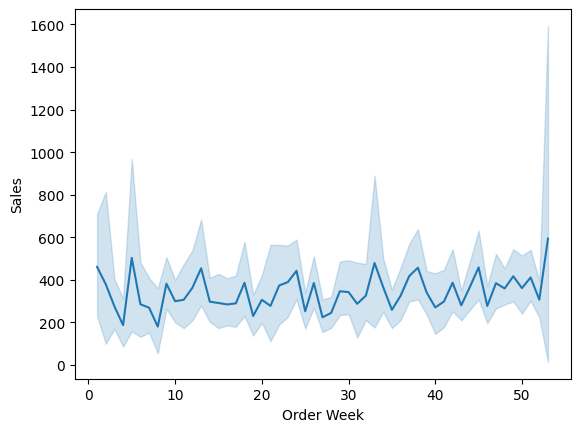

In [21]:
import seaborn as sns
sns.lineplot(x="Order Week",y="Sales",data=train)


In [22]:
# train["Time Taken"]=train['Ship Date'] - train['Order Date']
# train["Time Taken"]=train["Time Taken"].apply(lambda x: x.days)
train.drop(["Customer Name","Ship Date","Order Date","Ship Date","Postal Code","Product Name"],axis=1,inplace=True)

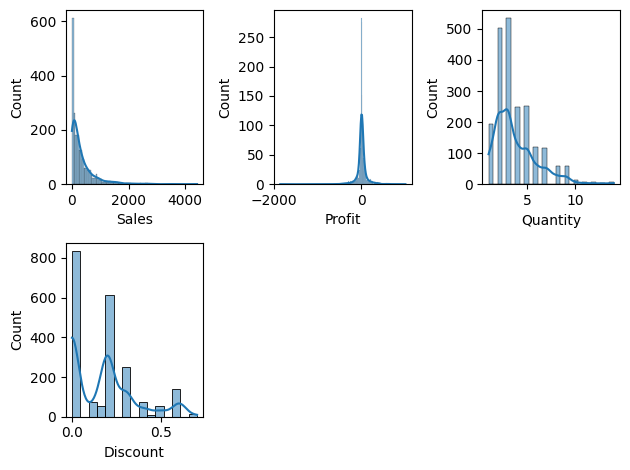

In [23]:
import matplotlib.pyplot as plt
num_features=["Sales","Profit","Quantity","Discount"]
for i, feature in enumerate(num_features):
    plt.subplot(2,3,i+1)
    sns.histplot(train[feature],kde=True)
    plt.tight_layout()



In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     2121 non-null   object 
 1   Segment       2121 non-null   object 
 2   City          2121 non-null   object 
 3   State         2121 non-null   object 
 4   Region        2121 non-null   object 
 5   Sub-Category  2121 non-null   object 
 6   Sales         2121 non-null   float64
 7   Quantity      2121 non-null   int64  
 8   Discount      2121 non-null   float64
 9   Profit        2121 non-null   float64
 10  Order Year    2121 non-null   int32  
 11  Order Week    2121 non-null   UInt32 
 12  Order Month   2121 non-null   int32  
dtypes: UInt32(1), float64(3), int32(2), int64(1), object(6)
memory usage: 192.8+ KB


In [26]:
x=train.drop("Sales",axis=1)
y=train["Sales"]

In [29]:
x.nunique()

Ship Mode          4
Segment            3
City             371
State             48
Region             4
Sub-Category       4
Quantity          14
Discount          11
Profit          1777
Order Year         4
Order Week        53
Order Month       12
dtype: int64

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     2121 non-null   object 
 1   Segment       2121 non-null   object 
 2   City          2121 non-null   object 
 3   State         2121 non-null   object 
 4   Region        2121 non-null   object 
 5   Sub-Category  2121 non-null   object 
 6   Quantity      2121 non-null   int64  
 7   Discount      2121 non-null   float64
 8   Profit        2121 non-null   float64
 9   Order Year    2121 non-null   int32  
 10  Order Week    2121 non-null   UInt32 
 11  Order Month   2121 non-null   int32  
dtypes: UInt32(1), float64(2), int32(2), int64(1), object(6)
memory usage: 176.2+ KB


In [64]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder, HashingEncoder
from category_encoders import CatBoostEncoder
# Define categorical columns by cardinality
high_cardinality = ['City', 'State','Ship Mode', 'Segment', 'Region', 'Sub-Category']  # 371 and 48 unique values
low_cardinality = ['Ship Mode', 'Segment', 'Region', 'Sub-Category']  # 4, 3, 4, 4 unique values

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('high_card', LabelEncoder(), high_cardinality),
    ],
    remainder='drop'  # drop any columns not specified
)

In [79]:
str="summary_df = pd.DataFrame([{\n    'Section': 'Summary',\n    'Total Products': total_products,\n    'Total Dead Stock Qty': total_qty,\n    'Total Dead Stock Value': total_val\n}])\n\n# Combine summary with other sections\nframes = [summary_df]\nfor section, data in final_output.items():\n    df_section = pd.DataFrame(data)\n    df_section.insert(0, 'Section', section)\n    frames.append(df_section)\n\noutput_df = pd.concat(frames, ignore_index=True)"

In [80]:
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [82]:
# preprocessor = Pipeline([
#     ('column_transformer', ColumnTransformer([
#         ('target_encode', TargetEncoder(smoothing=10.0), high_cardinality),
#         ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), low_cardinality)
#     ]))
# ])


In [87]:
preprocessor.fit_transform(X_train)

TypeError: LabelEncoder.fit_transform() takes 2 positional arguments but 3 were given

In [85]:
x_pre=preprocessor.fit_transform(X_train)

TypeError: LabelEncoder.fit_transform() takes 2 positional arguments but 3 were given

In [47]:
x_pre

array([[351.41861692, 351.41861692, 351.41861692, 351.41861692,
        351.41861692, 351.41861692],
       [351.41861692, 351.41861692, 351.41861692, 216.18930846,
        216.18930846, 351.41861692],
       [351.41861692, 216.18930846, 351.41861692, 351.41861692,
        222.96887231, 216.18930846],
       ...,
       [338.95247227, 349.48908798, 360.55996212, 345.93840453,
        344.5833494 ,  98.82488405],
       [450.73172338, 260.43244266, 330.36069663, 367.32506772,
        374.92268486,  98.70479707],
       [385.27730846, 256.42550195, 360.20437512, 345.55881219,
        373.57834135,  98.59945732]])

In [39]:
scaler.fit_transform(x_pre)

array([[ 0.        ,  0.11114005,  0.31131454,  0.21297819,  0.10245314,
        -0.2462403 ],
       [ 0.        ,  0.11114005,  0.31131454, -3.68877955, -2.55674053,
        -0.2462403 ],
       [ 0.        , -1.22134302,  0.31131454,  0.21297819, -2.42342495,
        -0.57739306],
       ...,
       [-0.10497078,  0.09212742,  0.53716168,  0.05485817, -0.03195781,
        -0.86479787],
       [ 0.83626287, -0.78539295, -0.20894491,  0.67192543,  0.56464488,
        -0.86509194],
       [ 0.28510604, -0.82487537,  0.52837651,  0.04390583,  0.53820926,
        -0.8653499 ]])

In [48]:
from sklearn.ensemble import RandomForestRegressor
model_pipeline_rf = Pipeline([
    ('regressor', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        max_depth=10
    ))
])

In [49]:
model=model_pipeline_rf.fit(scaler.transform(x_pre),y_train)

In [54]:
pred=model.predict(preprocessor.transform(X_test))

In [53]:
predicted_x=model.predict(scaler.transform(preprocessor.transform(X_test)))

In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("Corrected Metrics:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.3f}")

Corrected Metrics:
MSE: 354930.46
MAE: 456.53
R²: -0.158


In [58]:
import xgboost as xgb

model = xgb.XGBRegressor(
    objective="reg:absoluteerror",  # MAE instead of MSE
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1,   # L1 regularization
    reg_lambda=1   # L2 regularization
)


In [59]:
model=model.fit(x_pre, y_train)

In [60]:
pred=model.predict(preprocessor.transform(X_test))

In [61]:
mae=mean_absolute_error(y_test,pred)
mse=mean_squared_error(y_test, pred)
r2=r2_score(y_test, pred)


print("Mean Abosult Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Abosult Error: 236.29141462642536
Mean Squared Error: 264164.5511013006
R-squared Score: 0.13790089884998957


In [163]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,random_state=42)

In [164]:
model=model.fit(scaler.transform(x_pre), y_train)

In [165]:
pred=model.predict(scaler.transform(preprocessor.transform(X_test)))

In [167]:
pred_mae=mean_absolute_error(y_test,pred)
pred_mse=mean_squared_error(y_test, pred)
pred_r2=r2_score(y_test, pred)
print("Mean Abosulte Error:", pred_mae)
print("Mean Squared Error:", pred_mse)
print("R-squared Score:", pred_r2)

Mean Abosulte Error: 273.18701114879553
Mean Squared Error: 247189.1542115378
R-squared Score: 0.19329998377383018
